## Discussion Related With Outliers And Impact On Machine Learning

##### Which Machine Learning Models Are Sensitive To Outliers?
1. Naivye Bayes  Classifier ---- Not  Sensitive to Outliers
2. SVM ----Not sensitive
3. Linear Regression --- Sensitive
4. Logistic Regression -- Sensitive
5. Decision Tress Regressor or Classifier -- Not Sensitive
6. Ensemble (RF, XGBboost, GB) --  Not Sensitive
7. KNN --  Not Sensitive
8. Kmeans -- Sensitive
9. Hierarichal --- Sensitive
10. PCA ---  Sensitive
11. Neural Networks --- Sensitive

In [1]:
import pandas as pd

In [4]:
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Age'].isnull().sum()

177

In [6]:
import seaborn as sns

/home/fidel/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

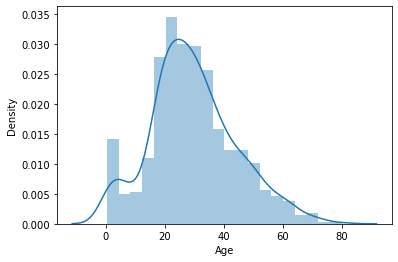

In [9]:
sns.distplot(df['Age'].dropna())

/home/fidel/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

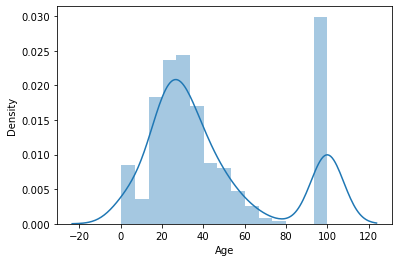

In [10]:
sns.distplot(df['Age'].fillna(100))

##### Gaussian Distribution

Text(0, 0.5, 'No of passenger')

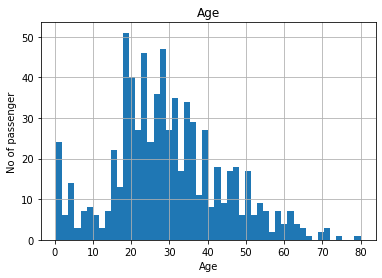

In [11]:
figure=df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

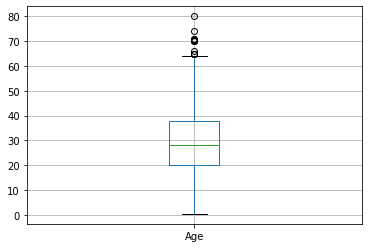

In [12]:
#checking if there is outliers
figure=df.boxplot(column="Age")

In [13]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### Assuming Age follows A Gaussian Distribution  we will calculate the boundaries which differentiates the outliers


##### If the data is Normally Distributed we use this

In [16]:
upper_boundary=df['Age'].mean() + 3 * df['Age'].std()
lower_boundary=df['Age'].mean() - 3 * df['Age'].std()
print(lower_boundary), print(upper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

### What if Feature is Skewed we use below Technique

Text(0, 0.5, 'No Of Passenger')

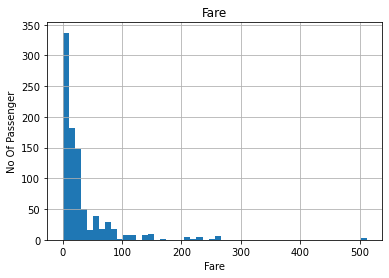

In [21]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No Of Passenger')

<AxesSubplot:>

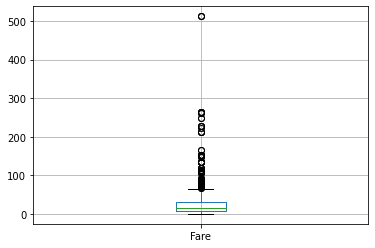

In [23]:
#checking if there is outliers
df.boxplot(column="Fare")

In [24]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
### Lets compute the Interquantile Range to calculate the boundaries
IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [26]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR *1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [27]:
#### Extreme outliers

lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR *3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [28]:
data=df.copy()

In [29]:
data.loc[data['Age']>=73, 'Age'] =73

Text(0, 0.5, 'No Of Passenger')

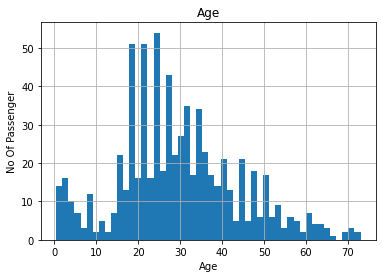

In [37]:
figure=data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No Of Passenger')

In [34]:
data.loc[data['Fare']>=100, 'Fare'] =100

In [35]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Text(0, 0.5, 'No Of Passenger')

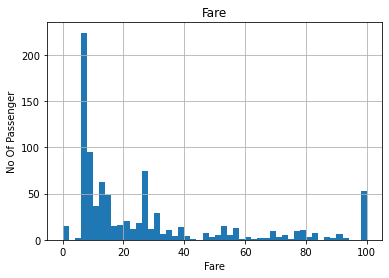

In [36]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No Of Passenger')